<strong><b><font size="5">Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python</font></b></strong>

<strong><b><font size="5">Forecasting - Previsões Para Séries Temporais - Modelo Base</font></b></strong>

<strong><b><font size="5">Modelo de Previsão de Capacidade - Método Naive</font></b></strong>

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd
from datetime import datetime
#from pandas import Series

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m

# Imports para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

sklearn    0.23.1
numpy      1.16.6
pandas     1.0.5
matplotlib 3.3.0
Data Science Academy


## Definição do Problema de Negócio

Previsão de arrecadação de ICMS.

## Conjunto de Dados

Usaremos conjuntos de dados que mostram a arrecadação de ICMS. Os dados tem registros dos anos de 2010 a 2015.

Será fornecido 1 dataset com 2 colunas, data e arrecadação de icms. 

In [3]:
# Carrega os dados
dataframe = pd.read_csv("Arrecadacao_icms.csv")
dataframe['Data'] = pd.to_datetime(dataframe.Data, format = '%d/%m/%Y')
dataframe = dataframe.set_index('Data')

In [4]:
# Dados
dataframe.head()

,Arrecadacao
Data,
2010-01-01,3299311
2010-02-01,2415158
2010-03-01,2613292
2010-04-01,2533679
2010-05-01,2426702


In [5]:
dataframe.dtypes

Arrecadacao    int64
dtype: object

In [6]:
dataframe.shape

(96, 1)

In [7]:
# Refinamos os dados para o gráfico da série original

# A variável Count é nossa variável target (total de pessoas que usaram transporte)
target = dataframe['Arrecadacao']

In [8]:
# Random seed 
np.random.seed(7)

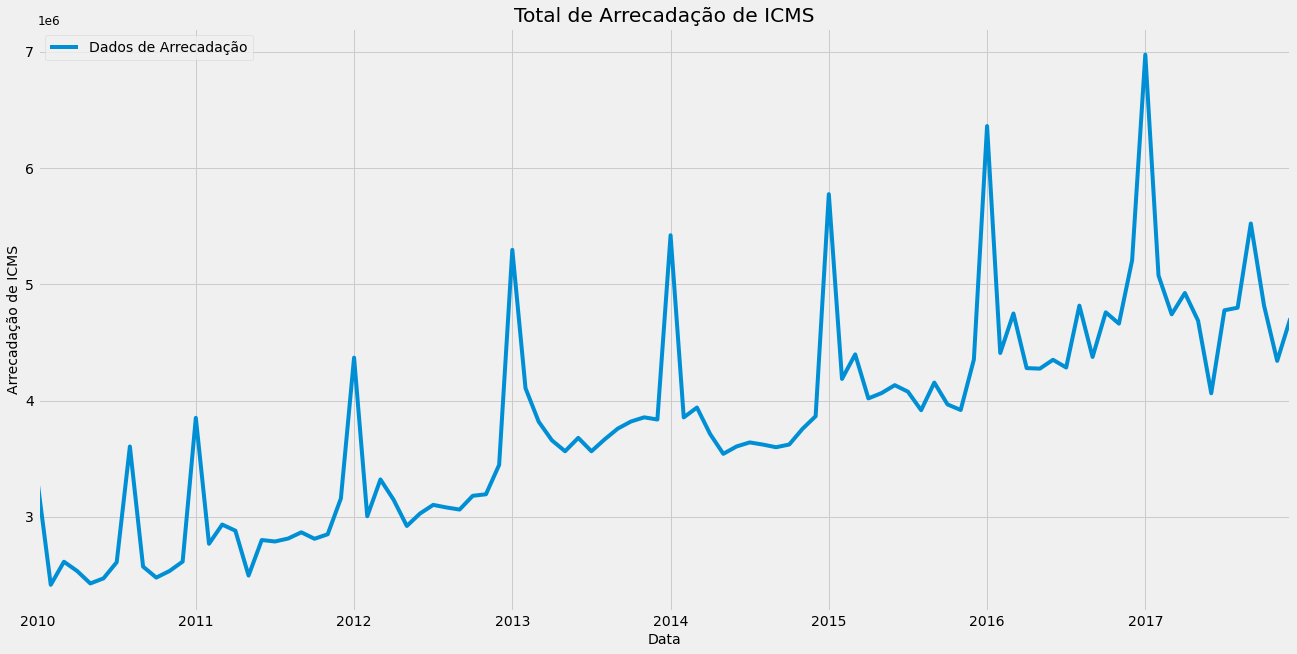

In [9]:
# Plot
target.plot(title = 'Total de Arrecadação de ICMS', fontsize = 14, label = 'Dados de Arrecadação') 
plt.xlabel("Data") 
plt.ylabel("Arrecadação de ICMS") 
plt.legend(loc = 'best') 
plt.show()

## Pré-Processamento

Vamos dividir os dados de treino e validação para treinar e validar a performance do modelo antes de usar os dados de teste.

In [10]:
# Os dados de treino serão divididos em dados de treino e teste.
# Observe que os registros são separados em ordem cronológica.
treino = dataframe.iloc[0:72]
teste = dataframe.iloc[72:]
print(len(treino), len(teste))

72 24


## Forecasting - Modelagem Preditiva Para Séries Temporais

Criaremos vários modelos para este problema que temos em mãos, aumentando o grau de complexidade a cada versão.

Mas toda caminhada deve começar com o primeiro passo. Vamos começar com o modelo preditivo mais simples que podemos criar.

### Método Naive

Técnica de estimativa na qual os dados reais do último período são usados como previsão desse período, sem ajustá-los ou tentar estabelecer fatores causais. É usado apenas para comparação com as previsões geradas pelas melhores técnicas (sofisticadas).

Naive = ingênuo

Não há técnica avançada aqui e apenas usamos como ponto de partida. Qualquer modelo mais avançado deve apresentar resultados superiores ao Método Naive.

In [11]:
# Criamos um array com os valores da variável target em treino
target = np.asarray(treino.Arrecadacao)
target

array([3299311, 2415158, 2613292, 2533679, 2426702, 2470459, 2609291,
       3604363, 2571657, 2477131, 2533387, 2614529, 3850949, 2767892,
       2933019, 2880387, 2494322, 2800248, 2787563, 2813031, 2866448,
       2810853, 2849528, 3157952, 4368558, 3004278, 3321157, 3145934,
       2920887, 3027938, 3102266, 3080324, 3062126, 3180518, 3193536,
       3446384, 5295883, 4105706, 3817682, 3657706, 3563558, 3678682,
       3563388, 3665695, 3758508, 3819554, 3855253, 3836488, 5421187,
       3854677, 3939469, 3711495, 3541494, 3604519, 3639599, 3621008,
       3598134, 3621588, 3755670, 3864993, 5774586, 4185463, 4396698,
       4018107, 4063825, 4131957, 4075758, 3916651, 4154162, 3966277,
       3918288, 4352525], dtype=int64)

In [12]:
# Cria uma cópia dos dados de validação
predict = teste.copy()
predict.head()

,Arrecadacao
Data,
2016-01-01,6360023
2016-02-01,4408531
2016-03-01,4748431
2016-04-01,4278694
2016-05-01,4273985


In [13]:
# Previsão

# Veja como o método é mesmo Naive
# Os dados reais (de treino) são usados como previsão para os dados de validação, 
# sem ajustá-los ou tentar estabelecer fatores causais.

# Sim, isso é o Método Naive!
predict['previsao_naive'] = target[len(target) - 1] 

In [14]:
# Colocamos lado a lado, valor real e valor "previsto"
predict[['Arrecadacao', 'previsao_naive']].head()

,Arrecadacao,previsao_naive
Data,,
2016-01-01,6360023,4352525
2016-02-01,4408531,4352525
2016-03-01,4748431,4352525
2016-04-01,4278694,4352525
2016-05-01,4273985,4352525


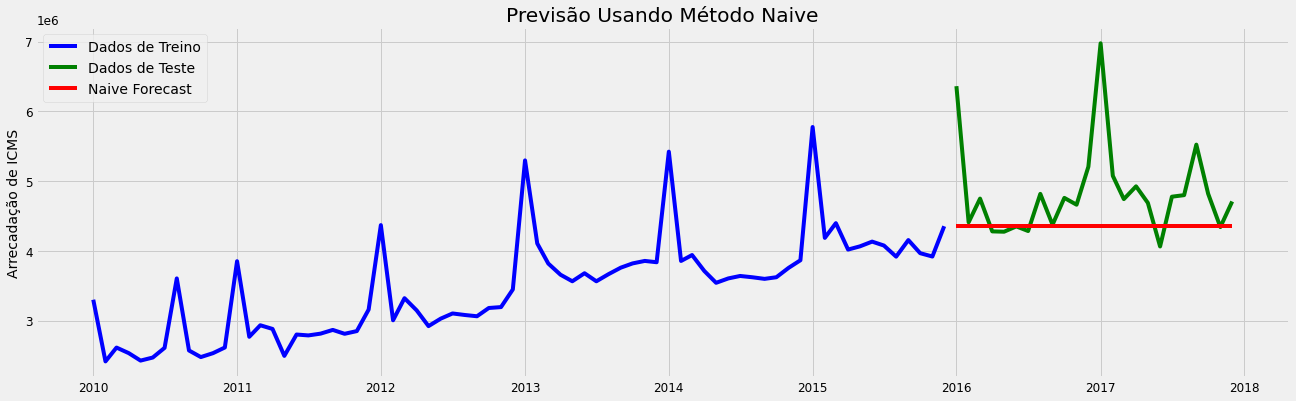

In [15]:
# Plot
plt.figure(figsize = (20, 6))
plt.title("Previsão Usando Método Naive") 
plt.plot(treino.index, treino['Arrecadacao'], label = 'Dados de Treino', color = 'blue') 
plt.plot(teste.index, teste['Arrecadacao'], label = 'Dados de Teste', color = 'green') 
plt.plot(predict.index, predict['previsao_naive'], label = 'Naive Forecast', color = 'red') 
plt.ylabel('Arrecadação de ICMS')
plt.legend(loc = 'upper left') 
plt.show()

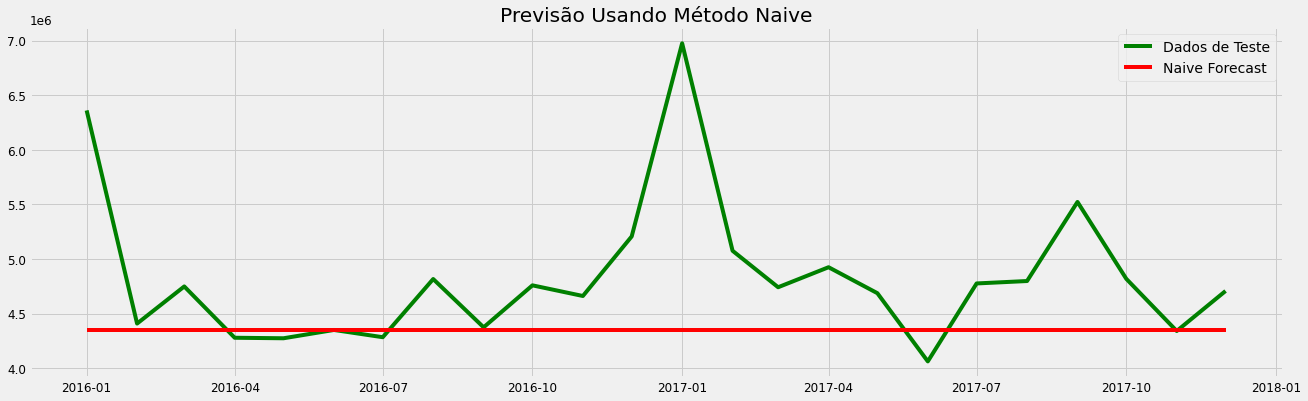

In [17]:
# Plot
plt.figure(figsize = (20, 6))
plt.title("Previsão Usando Método Naive") 
plt.plot(teste.index, teste['Arrecadacao'], label = 'Dados de Teste', color = 'green') 
plt.plot(predict.index, predict['previsao_naive'], label = 'Naive Forecast', color = 'red') 
plt.legend(loc = 'best') 
plt.show()

Pronto! Temos a previsão da nossa série! Você apresentaria esse modelo ao investidor disposto a investir no seu negócio? Espero que não! 

Então vamos trabalhar para criar um modelo robusto nas próximas aulas. Mas antes, vamos calcular a taxa de erro do modelo. 

In [18]:
# Define valor real e valor previsto
y_true = predict.Arrecadacao
y_pred = predict.previsao_naive

In [19]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse) 

805471.0878885308


Todas as aulas deste curso podem ser encontradas na timeline da Comunidade no portal da DSA: www.datascienceacademy.com.br

# Fim